In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

dataset = pd.read_csv("dataset.csv")

In [248]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)


In [249]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

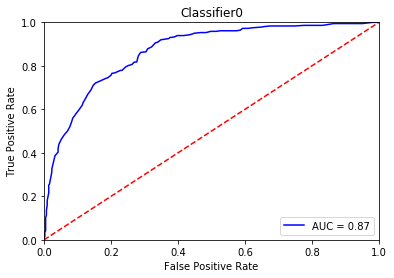

In [260]:
rf0 = RandomForestClassifier(random_state=0)
rf0.fit(xtrain,ytrain)
y_pred0=rf0.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier0')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [250]:
import math
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [354]:
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=0)
kfold = StratifiedKFold(n_splits=7, shuffle = True,random_state=0)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=kfold, verbose=2, random_state=0,scoring='roc_auc')
rf_random.fit(xtrain, ytrain)

Fitting 7 folds for each of 100 candidates, totalling 700 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   2.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   3.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, mi

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   3.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   3.9s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   4.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   4.0s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1800, m

[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.6s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   4.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=40

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   6.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   6.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   6.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   6.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   3.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   2.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=200, m

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, mi

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   9.2s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   9.2s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   9.0s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   9.1s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=4

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   4.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=400, min_

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   5.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   5.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=600, min_sampl

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_sampl

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed: 51.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [355]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

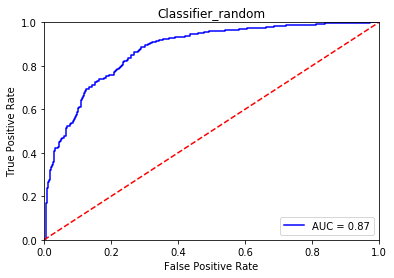

In [356]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

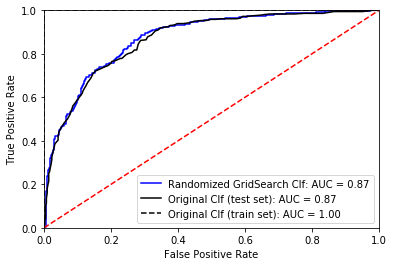

In [357]:
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Randomized GridSearch Clf: AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k', label = 'Original Clf (test set): AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytrain, rf0.predict_proba(xtrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'Original Clf (train set): AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [358]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred1)
print ("Original Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Original Accuracy: ", accuracy_score(ytest, y_pred0))
from sklearn.metrics import precision_score, recall_score, f1_score
print ('Original Precision:',precision_score(ytest,y_pred0))
print ('Original recall:',recall_score(ytest,y_pred0))
print ('Original f1:',f1_score(ytest,y_pred0))

Original Confusion Matrix: 
 [[236 194]
 [196 166]]
Original Accuracy:  0.7752525252525253
Original Precision: 0.7421052631578947
Original recall: 0.7790055248618785
Original f1: 0.7601078167115902


In [359]:
rgrid_pred=rf_random.predict(xtest)
cm1 = confusion_matrix(ytest,rgrid_pred)
print ("Randomized GSCV Confusion Matrix: \n", cm1)
print ("Randomized GSCV Accuracy: ", accuracy_score(ytest, rgrid_pred))
print ('Randomized GSCV Precision:',precision_score(ytest, rgrid_pred))
print ('Randomized GSCV Recall:',recall_score(ytest, rgrid_pred))
print ('Randomized GSCV f1:',f1_score(ytest,rgrid_pred))

Randomized GSCV Confusion Matrix: 
 [[331  99]
 [ 73 289]]
Randomized GSCV Accuracy:  0.7828282828282829
Randomized GSCV Precision: 0.7448453608247423
Randomized GSCV Recall: 0.7983425414364641
Randomized GSCV f1: 0.7706666666666667


In [360]:
rf3=RandomForestClassifier(max_depth=20,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=600,random_state=0,bootstrap=False)
rf3.fit(xtrain,ytrain)
y_pred3 = rf3.predict(xtest)

rf4=RandomForestClassifier(max_depth=20,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=600,random_state=0,bootstrap=False)
rf4.fit(xtrain,ytrain)
threshold = 0.7
y_pred4_proba=rf4.predict_proba(xtest)
y_pred4 = (y_pred4_proba[:,1]>=threshold).astype('int')


In [361]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision (threshold=0.5):',precision_score(ytest,y_pred3))
print('recall (threshold=0.5)',recall_score(ytest,y_pred3))
print('f1 (threshold=0.5)',f1_score(ytest,y_pred3))

print('precision (threshold=0.7):',precision_score(ytest,y_pred4))
print('recall (threshold=0.7)',recall_score(ytest,y_pred4))
print('f1 (threshold=0.7)',f1_score(ytest,y_pred4))

precision (threshold=0.5): 0.7448453608247423
recall (threshold=0.5) 0.7983425414364641
f1 (threshold=0.5) 0.7706666666666667
precision (threshold=0.7): 0.8434782608695652
recall (threshold=0.7) 0.5359116022099447
f1 (threshold=0.7) 0.6554054054054054


In [362]:
instance=dataset.iloc[3900:3901,0:23]
prediction, bias, contributions = ti.predict(rf3, instance)
print ('Prediction', prediction)
print ('Bias (trainset prior)', bias)
print ('Feature contributions:')
for c, feature in zip(contributions[0], features):
    print (feature, c)

Prediction [[0.93222222 0.06777778]]
Bias (trainset prior) [[0.54533965 0.45466035]]
Feature contributions:
creatinine [ 0.05082255 -0.05082255]
po2 [ 0.02143233 -0.02143233]
fio2 [ 0.11496146 -0.11496146]
pco2 [ 0.01648852 -0.01648852]
bp_min [-0.00188436  0.00188436]
bp_max [ 0.00751974 -0.00751974]
pain [ 0.0028045 -0.0028045]
k [ 0.01833994 -0.01833994]
hr_min [-0.00784882  0.00784882]
hr_max [-0.04082605  0.04082605]
gcs_min [ 0.01755357 -0.01755357]
gcs_max [-0.00703742  0.00703742]
bun [ 0.08393627 -0.08393627]
hco3 [ 0.0077325 -0.0077325]
airway [-0.08187197  0.08187197]
resp_min [-0.00979756  0.00979756]
resp_max [ 0.06940322 -0.06940322]
haemoglobin [ 0.06575218 -0.06575218]
spo2_min [ 0.02848674 -0.02848674]
spo2_max [ 0.0134403 -0.0134403]
temp_min [ 0.01182651 -0.01182651]
temp_max [ 0.01040967 -0.01040967]
na [-0.00476125  0.00476125]
